# TS plots of each model and their differences between WOA 1981-2010

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
import gsw
import numpy as np
import fastjmd95

In [2]:
import matplotlib.patches as patches

In [3]:
woa = xr.open_dataarray('/home/jovyan/chapter1/WOA/ts_hist_0512.nc')
ecco = xr.open_dataarray('/home/jovyan/chapter1/ECCO-budgets/ts_hist_mean_ECCO.nc')
sose = xr.open_dataarray('/home/jovyan/chapter1/SOSE-budgets/ts_hist_mean_SOSE.nc')
soda = xr.open_dataarray('/home/jovyan/chapter1/SODA/ts_hist_mean_SODA.nc')

# <span style='background :yellow'> TS plots of models and WOA </span>

**Testing to see if salt/theta bins are equal for each model**

In [4]:
np.testing.assert_array_equal(ecco.salt_bin, sose.salt_bin)

In [5]:
np.testing.assert_array_equal(sose.salt_bin, soda.salt_bin)

In [6]:
np.testing.assert_array_equal(ecco.theta_bin, sose.theta_bin)

In [7]:
np.testing.assert_array_equal(sose.theta_bin, soda.theta_bin)

In [8]:
#Since salt/theta bins are equal just use one of the models to define sigma
sigma2 = fastjmd95.rho(ecco.salt_bin, ecco.theta_bin, 2000.)

(-2.0, 4.0)

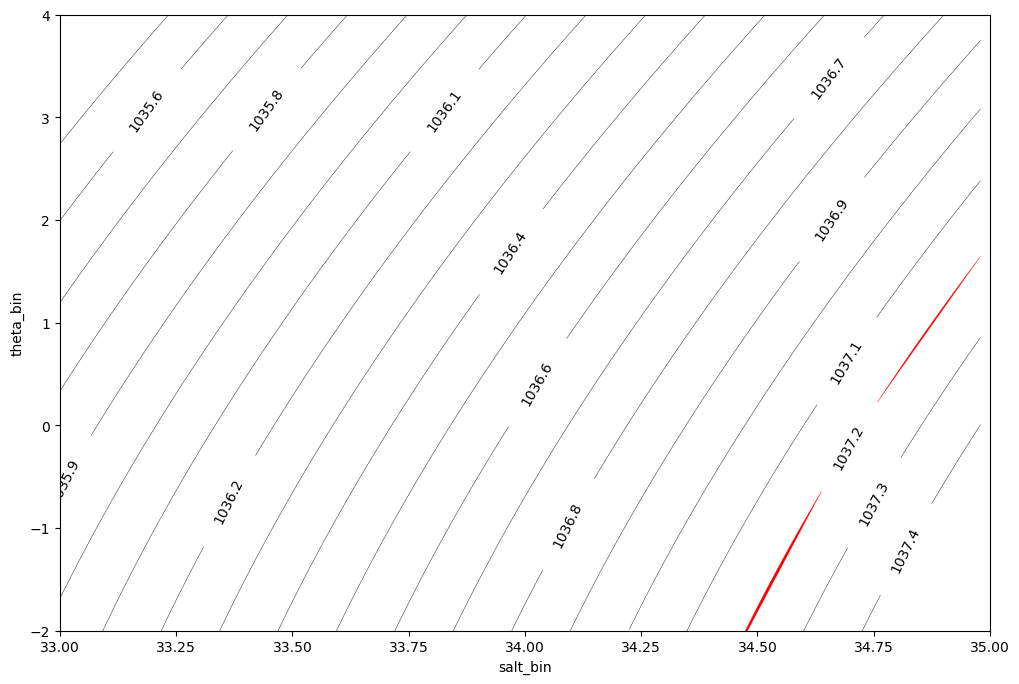

In [9]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sigma_levs = np.arange(1035.5, 1037.5, 0.1)

C = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax)
plt.clabel(C)
C.collections[-3].set_color('red') 
#diff_ecco_woa8110.where(diff_ecco_woa8110>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                                                  #cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'})

#ax.set_xlabel('Salinity [g/kg]')
#ax.set_ylabel('Potential Temperature [˚C]')
#ax.set_title('Difference between \n ECCO (1992-2016) and WOA (1981-2010)', fontsize=20);
ax.set_xlim(33, 35)
ax.set_ylim(-2, 4)
#plt.savefig('ts-plot-ecco-woa8110.pdf');

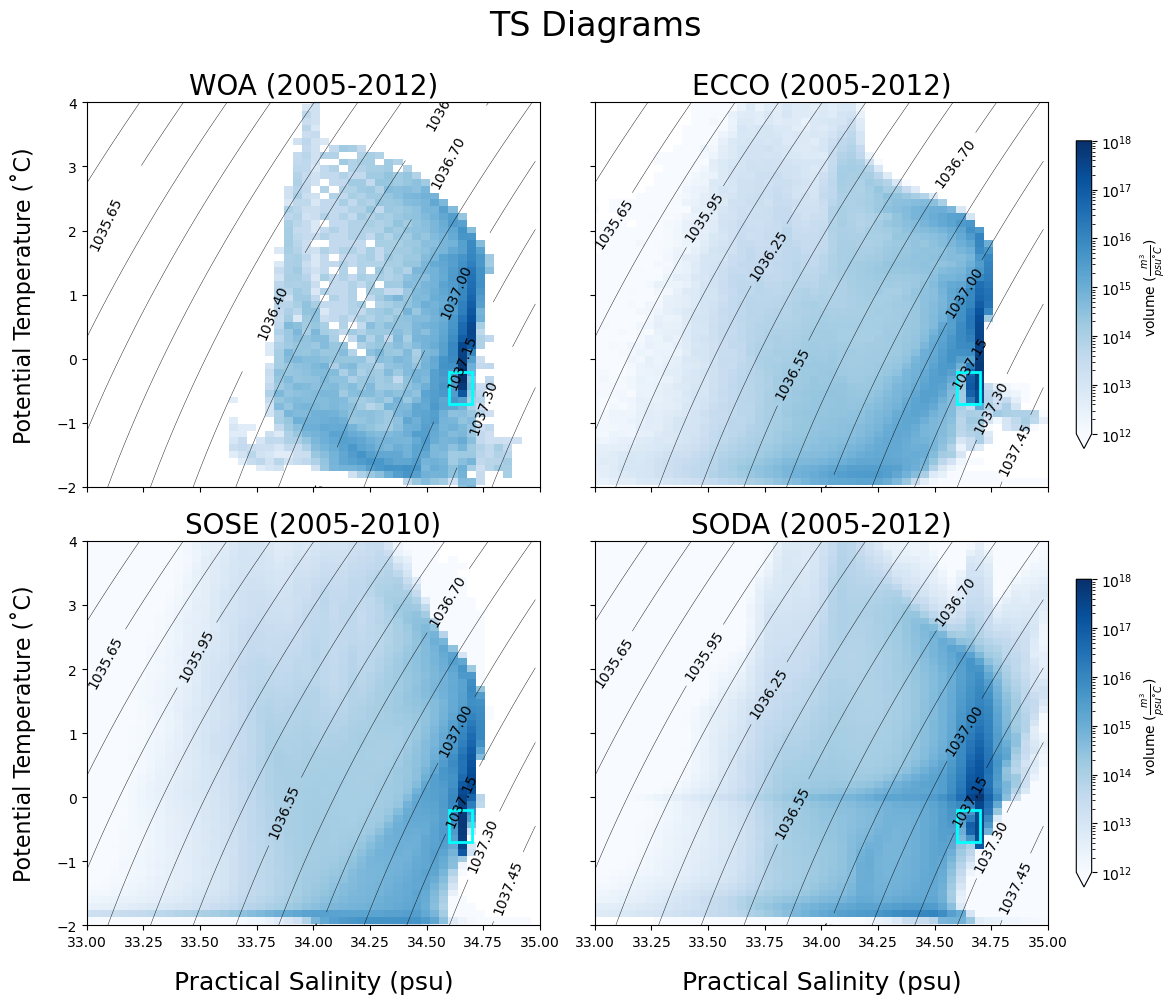

In [15]:
fig, ax = plt.subplots(2,2, figsize=(12,10), sharex=True, sharey=True, gridspec_kw={'width_ratios': [2, 2.5]})
sigma_levs = np.arange(1035.5, 1037.5, 0.15)
#sigma_levs = np.arange(1035.5, 1037.5, 0.1)

C = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[0,0]) 
#C.collections[-3].set_color('lawngreen') 
#1037.16 for sigma2 def from orsi https://doi.org/10.1016/S0079-6611(99)00004-X
ax[0,0].clabel(C)
woa.where(woa>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18, add_colorbar=False, ax=ax[0,0])
ax[0,0].set_title('WOA (2005-2012)', fontsize=20)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Potential Temperature (˚C)', fontsize=16, labelpad=15)
ax[0,0].set_xlim(33, 35)
ax[0,0].set_ylim(-2, 4)

C1 = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[0,1])
#C1.collections[-4].set_color('lawngreen') 
ax[0,1].clabel(C1)
ecco.where(ecco>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                        cbar_kwargs={'shrink':0.8, 'label': r'volume ($\frac{m^3}{psu ˚C}$)'}, ax=ax[0,1])
ax[0,1].set_title('ECCO (2005-2012)', fontsize=20)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].set_xlim(33, 35)
ax[0,1].set_ylim(-2, 4)

C2 = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[1,0])
#C2.collections[-4].set_color('lawngreen') 
ax[1,0].clabel(C2)
sose.where(sose>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                        add_colorbar=False, ax=ax[1,0])
ax[1,0].set_title('SOSE (2005-2010)', fontsize=20)
ax[1,0].set_xlabel('Practical Salinity (psu)', fontsize=18, labelpad=15)
ax[1,0].set_ylabel('Potential Temperature (˚C)', fontsize=16, labelpad=15)
ax[1,0].set_xlim(33, 35)
ax[1,0].set_ylim(-2, 4)

C3 = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[1,1])
#C3.collections[-3].set_color('lawngreen') 
ax[1,1].clabel(C3)
soda.where(soda>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e12, vmax=1e18,
                        cbar_kwargs={'shrink':0.8, 'label': r'volume ($\frac{m^3}{psu ˚C}$)'}, ax=ax[1,1])
ax[1,1].set_title('SODA (2005-2012)', fontsize=20)
ax[1,1].set_xlabel('Practical Salinity (psu)', fontsize=18, labelpad=15)
ax[1,1].set_ylabel('')
ax[1,1].set_xlim(33, 35)
ax[1,1].set_ylim(-2, 4)

rect0 = patches.Rectangle((34.6, -0.7), 0.1, 0.5, linewidth=2, edgecolor='cyan', facecolor='none')
rect1 = patches.Rectangle((34.6, -0.7), 0.1, 0.5, linewidth=2, edgecolor='cyan', facecolor='none')
rect2 = patches.Rectangle((34.6, -0.7), 0.1, 0.5, linewidth=2, edgecolor='cyan', facecolor='none')
rect3 = patches.Rectangle((34.6, -0.7), 0.1, 0.5, linewidth=2, edgecolor='cyan', facecolor='none')
rect3 = patches.Rectangle((34.6, -0.7), 0.1, 0.5, linewidth=2, edgecolor='cyan', facecolor='none')

# Add the patch to the Axes
ax[0,0].add_patch(rect0)
ax[0,1].add_patch(rect1)
ax[1,0].add_patch(rect2)
ax[1,1].add_patch(rect3)

plt.suptitle('TS Diagrams', fontsize=24, y=1)
plt.tight_layout()
plt.savefig('ts-plots.pdf', transparent=True);

# <span style='background :yellow'> TS plots of difference between models and WOA </span>

In [12]:
diff_ecco_woa8110 = ecco - woa
diff_sose_woa8110 = sose - woa
diff_soda_woa8110 = soda - woa

## <span style='color:Purple'> Semi-Log Scale
using `SymLogNorm()` --> have to specify `linthresh` parameter - below this absolute value the colormap is linear, and outside the ± bounds cmap is logarithmic.

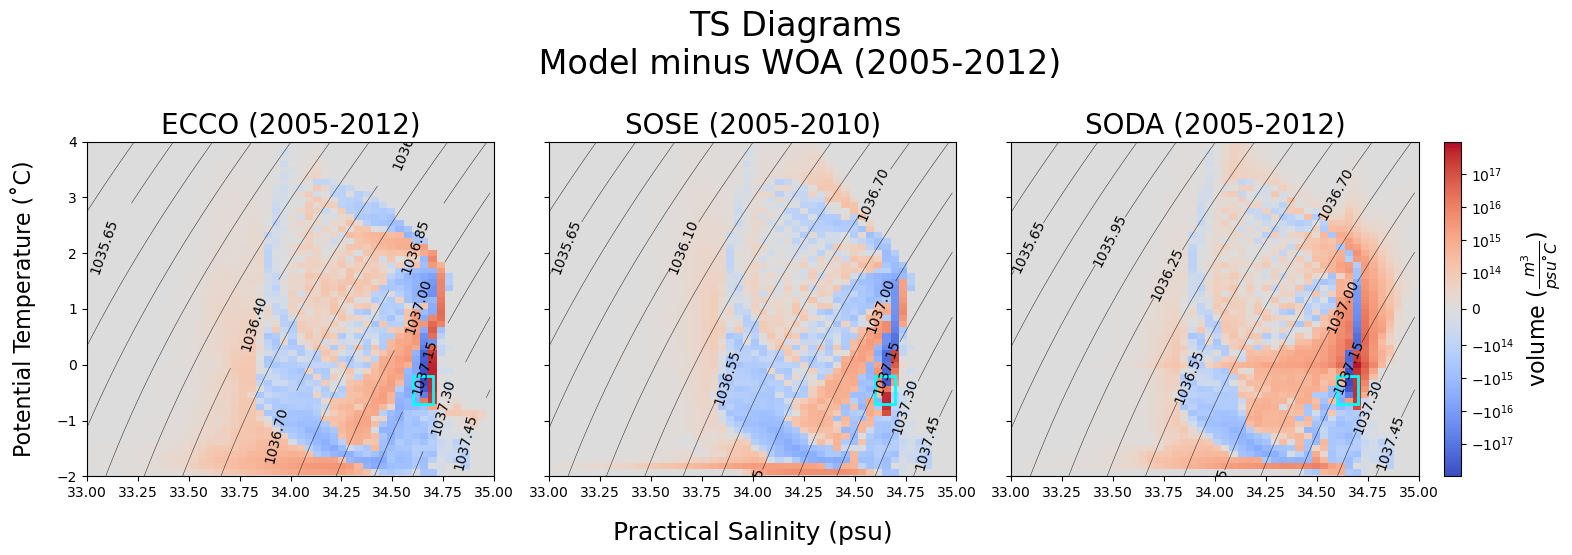

In [14]:
fig, ax = plt.subplots(1,3, figsize=(16,5.5), sharex=True, sharey=True, gridspec_kw={'width_ratios': [2, 2, 2.5]})
sigma_levs = np.arange(1035.5, 1037.5, 0.15)
#sigma_levs = np.arange(1035.5, 1037.5, 0.1)

C = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[0])
#C.collections[-4].set_color('lawngreen') 
ax[0].clabel(C)
diff_ecco_woa8110.plot(norm=SymLogNorm(linthresh=1e14), cmap='coolwarm', vmax=1e18, 
                       add_colorbar=False, ax=ax[0])
ax[0].set_title('ECCO (2005-2012)', fontsize=20)
ax[0].set_xlabel('')
ax[0].set_ylabel('Potential Temperature (˚C)', fontsize=16, labelpad=15)
ax[0].set_xlim(33, 35)
ax[0].set_ylim(-2, 4)

C1 = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[1])
#C1.collections[-4].set_color('lawngreen') 
ax[1].clabel(C1)
diff_sose_woa8110.plot(norm=SymLogNorm(linthresh=1e14), cmap='coolwarm', vmax=1e18, 
                       add_colorbar=False, ax=ax[1])
ax[1].set_title('SOSE (2005-2010)', fontsize=20)
ax[1].set_xlabel('Practical Salinity (psu)', fontsize=18, labelpad=15)
ax[1].set_ylabel('')
ax[1].set_xlim(33, 35)
ax[1].set_ylim(-2, 4)

C2 = sigma2.T.plot.contour(colors='k', linewidths=0.3, levels=sigma_levs, ax=ax[2])
#C2.collections[-4].set_color('lawngreen') 
ax[2].clabel(C2)
t = diff_soda_woa8110.plot(norm=SymLogNorm(linthresh=1e14), cmap='coolwarm', vmax=1e18, 
                           add_colorbar=False, ax=ax[2])
fig.colorbar(t).set_label(r'volume ($\frac{m^3}{psu ˚C}$)', fontsize=16)
ax[2].set_title('SODA (2005-2012)', fontsize=20)
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].set_xlim(33, 35)
ax[2].set_ylim(-2, 4)

rect0 = patches.Rectangle((34.6, -0.7), 0.1, 0.5, linewidth=2, edgecolor='cyan', facecolor='none')
rect1 = patches.Rectangle((34.6, -0.7), 0.1, 0.5, linewidth=2, edgecolor='cyan', facecolor='none')
rect2 = patches.Rectangle((34.6, -0.7), 0.1, 0.5, linewidth=2, edgecolor='cyan', facecolor='none')

# Add the patch to the Axes
ax[0].add_patch(rect0)
ax[1].add_patch(rect1)
ax[2].add_patch(rect2)

plt.suptitle('TS Diagrams\n Model minus WOA (2005-2012)', fontsize=24, y=1)
plt.tight_layout()
plt.savefig('ts-plots-diffs.pdf', transparent=True);